<a href="https://colab.research.google.com/github/carson-edmonds/AAI-521-Sports-Image-Classification/blob/main/Steve-Dataset_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-processing

In [1]:
!pip install -q kaggle
!pip install -q patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 2.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import requests
from PIL import Image
from io import BytesIO
import random
import pickle
from sklearn.model_selection import train_test_split
import patoolib

# Data visualization
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from google.colab import files

In [3]:
# get api key from kaggle
# upload kaggle.json that was generated from kaggle
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rishikeshkonapure/sports-image-dataset/
! mkdir kaggle_data
! unzip /content/sports-image-dataset.zip -d kaggle_data

Streaming output truncated to the last 5000 lines.
  inflating: kaggle_data/data/shooting/00000172.jpg  
  inflating: kaggle_data/data/shooting/00000173.jpg  
  inflating: kaggle_data/data/shooting/00000174.jpg  
  inflating: kaggle_data/data/shooting/00000175.jpg  
  inflating: kaggle_data/data/shooting/00000176.jpg  
  inflating: kaggle_data/data/shooting/00000177.jpg  
  inflating: kaggle_data/data/shooting/00000178.jpg  
  inflating: kaggle_data/data/shooting/00000179.jpg  
  inflating: kaggle_data/data/shooting/00000180.jpg  
  inflating: kaggle_data/data/shooting/00000183.jpg  
  inflating: kaggle_data/data/shooting/00000184.jpg  
  inflating: kaggle_data/data/shooting/00000185.JPG  
  inflating: kaggle_data/data/shooting/00000186.jpg  
  inflating: kaggle_data/data/shooting/00000187.jpg  
  inflating: kaggle_data/data/shooting/00000188.jpg  
  inflating: kaggle_data/data/shooting/00000189.jpg  
  inflating: kaggle_data/data/shooting/00000190.JPG  
  inflating: kaggle_data/data/s

In [ ]:
data_dir = '/content/kaggle_data/data'
categories = ["badminton", "baseball", "basketball", "boxing",
                "chess", "cricket", "fencing", "football", "formula1",
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp",
                "shooting", "swimming", "table_tennis", "tennis", "volleyball",
                "weight_lifting", "wrestling", "wwe"]

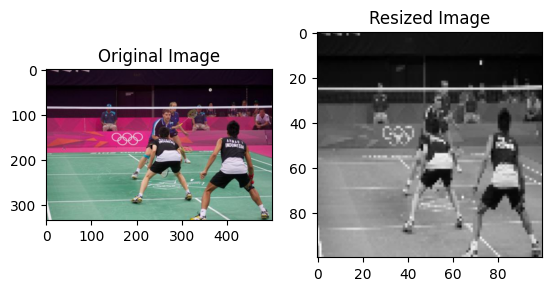

In [ ]:
# Display the original and resized images for the first row
plt.subplot(1, 2, 1)
plt.imshow(covert_to_rgb(df['img_raw'][0]))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_grey[0], cmap='gray')
plt.title('Resized Image')

plt.show()

In [ ]:
#create training data
training_data_raw = []
img_size = 100

def create_training_data():
    for i in categories:

        path = os.path.join(data_dir,i) #create path to sports types
        class_num = categories.index(i) #get the classification (indexing each category)
        for img in os.listdir(path):
            try:
                # Read original images
                img_raw = cv2.imread(os.path.join(path,img))
                img_raw_resized = cv2.resize(img_raw,(img_size,img_size))
                training_data_raw.append([img_raw_resized,class_num])

                # Read images as grayscale
                img_gray = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_gray_resized = cv2.resize(img_gray,(img_size,img_size))
                training_data_gray.append([img_gray_resized,class_num])

            except Exception as e:
                pass
    # return (img_raw, img_raw_resized, class_num), (img_gray, img_gray_resized, class_num)

create_training_data()
print("training data size", len(training_data_raw))

training data size 14271


In [ ]:
#shuffle all the training data
random.shuffle(training_data_gray)
for sample in training_data_gray[:2]:
    print(sample) #print first 5

[array([[57, 55, 55, ..., 58, 55, 56],
       [56, 55, 55, ..., 58, 54, 56],
       [56, 55, 56, ..., 58, 54, 57],
       ...,
       [64, 64, 64, ..., 72, 72, 72],
       [62, 62, 62, ..., 73, 72, 72],
       [60, 60, 60, ..., 74, 73, 73]], dtype=uint8), 17]
[array([[ 54,  55,  46, ...,  34,  28,  28],
       [ 53,  51,  49, ...,  45,  32,  36],
       [ 50,  47,  51, ...,  51,  40,  36],
       ...,
       [203, 203, 203, ..., 196, 194, 193],
       [204, 205, 203, ..., 197, 194, 200],
       [206, 203, 202, ..., 198, 193, 197]], dtype=uint8), 10]


In [ ]:
#creating lable and features - for color

x=[] #features
y=[] #label
#y = np.array(y)

for features,label in training_data_raw:
    x.append(features)
    y.append(label)
    np.array((y, label))

print("Before converting into numpy array:")
x = np.array(x).reshape(-1,img_size,img_size,1)
y = np.array(y)


# normalize inputs from 0-255 to 0-1
x = x/255.0

<ipython-input-6-e06565115dbb>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y, label))


Before converting into numpy array:


In [ ]:
#creating lable and features - for gray

x_gray=[] #features
y_gray=[] #label
#y = np.array(y)

for features,label in training_data_gray:
    x_gray.append(features)
    y_gray.append(label)
    np.array((y_gray, label))

print("Before converting into numpy array:")
print("X gray (img)", x_gray[0])
print("Y gray (category)", y_gray[0])
x_gray = np.array(x_gray).reshape(-1,img_size,img_size,1)
y_gray = np.array(y_gray)


# normalize inputs from 0-255 to 0-1
x_gray = x_gray/255.0

print("After Normalizing and converting into numpy array:")
print("X shape", x_gray.shape)
print("Y shape", y_gray.shape)

<ipython-input-5-461b541ef4ab>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y_gray, label))


Before converting into numpy array:
X gray (img) [[178 178 178 ... 148 145 145]
 [177 177 177 ... 147 145 145]
 [176 176 176 ... 145 145 145]
 ...
 [140 139 139 ...  91  91  90]
 [140 139 139 ...  91  90  89]
 [140 139 139 ...  91  90  88]]
Y gray (category) 0
After Normalizing and converting into numpy array:
X shape (14271, 244, 244, 1)
Y shape (14271,)


## Save with Pickle

In [ ]:
#Optional Save the x and y

In [ ]:
#dumping data into pickle file
#x_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/x.pickle'
#y_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/y.pickle'

#pickle file for features
#pickle_out = open(x_location,"wb") #path to save pickle file
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle file for label
#pickle_out = open(y_location,"wb") #path to save pickle file
#pickle.dump(y,pickle_out)
#pickle_out.close()

In [ ]:
#importing data (pickle) files x and y
#pickle_in = open(x_location,"rb")   #rb - read binary form #wb - Write binary form
#x = pickle.load(pickle_in)


#pickle_in = open(y_location,"rb")   #rb - read binary form #wb - Write binary form
#y = pickle.load(pickle_in)

## Train Test Split

In [ ]:
#create a split of data for the model fit and training
# train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2)

train_x_gray,test_x_gray, train_y_gray,test_y_gray = train_test_split(x_gray,y_gray,test_size=0.2)

print(type(train_x_gray))
print(type(test_x_gray))
print(train_x_gray.shape)
print(test_x_gray.shape)

In [ ]:
test_y_cat = to_categorical(test_y)
train_y_cat = to_categorical(train_y)
print("one hot encoded for categorial")
print(train_y_cat[1])
print(len(train_y_cat[0]))

##Object Detection - YOLOv8

In [6]:
#Clone yolo 8 and check all dependencies
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.9/78.2 GB disk)


In [7]:
#Train YOLO8 model
from ultralytics import YOLO
model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=10)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.23M/6.23M [00:00<00:00, 135MB/s]


Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=F

100%|██████████| 6.66M/6.66M [00:00<00:00, 141MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3480.20file/s]

Dataset download success ✅ (1.4s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 36.5MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Transferred 355/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 576.11it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.71G      1.153      1.397      1.193         81        640: 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]

                   all        128        929      0.667      0.507      0.581      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.57G       1.14      1.335      1.199        121        640: 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        128        929      0.668      0.513      0.606      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.5G      1.142      1.242      1.172        108        640: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        128        929      0.677      0.533      0.622      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.55G      1.154      1.288       1.18        116        640: 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        128        929      0.671       0.55      0.646      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.58G      1.165      1.225      1.205         68        640: 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        128        929      0.667      0.588      0.663      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.54G       1.14      1.224      1.178         95        640: 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        128        929      0.651      0.614      0.672      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.53G      1.136      1.207      1.185        115        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        128        929      0.649      0.636      0.686       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.55G      1.108      1.185      1.172         71        640: 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        128        929      0.666      0.654      0.694      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.5G      1.114      1.124      1.151        142        640: 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        128        929      0.673       0.66      0.703      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.5G      1.083      1.128      1.172        104        640: 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        128        929      0.667      0.671      0.707      0.525



10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]


                   all        128        929      0.666      0.673      0.708      0.526
                person        128        254      0.794      0.699      0.776      0.568
               bicycle        128          6      0.758      0.333      0.387      0.323
                   car        128         46      0.566      0.217      0.318      0.186
            motorcycle        128          5      0.659        0.8       0.92      0.726
              airplane        128          6      0.808          1      0.972      0.753
                   bus        128          7      0.822      0.714      0.735      0.616
                 train        128          3      0.531          1      0.913      0.781
                 truck        128         12      0.622        0.5      0.534      0.375
                  boat        128          6          1      0.309      0.518      0.372
         traffic light        128         14      0.494      0.214      0.188      0.146
             stop sig

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799f0cd04340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [8]:
#Test model on images from test dataset
from IPython.display import Image
metrics = model.val()

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]


                   all        128        929      0.654      0.647      0.697      0.522
                person        128        254      0.785      0.706      0.782      0.568
               bicycle        128          6      0.763      0.333      0.382      0.317
                   car        128         46      0.571      0.217      0.309      0.185
            motorcycle        128          5      0.659        0.8      0.906       0.71
              airplane        128          6      0.807          1      0.972      0.753
                   bus        128          7      0.864      0.714      0.736      0.628
                 train        128          3      0.531          1      0.913      0.781
                 truck        128         12      0.623        0.5      0.524      0.356
                  boat        128          6      0.533      0.167      0.425      0.303
         traffic light        128         14      0.375      0.143      0.179      0.144
             stop sig

In [9]:
#Function to predict object classes
def obj_det(image_path):
  results = model(source=image_path,save=True, save_txt=True, project='runs/detect', name='predict', exist_ok=True)
  N = 12
  img_numb = image_path[-N:]
  return Image(filename='/content/runs/detect/predict/'+img_numb,width=600)


image 1/1 /content/kaggle_data/data/tennis/00000007.jpg: 512x640 1 person, 1 sports ball, 1 tennis racket, 269.6ms
Speed: 3.1ms preprocess, 269.6ms inference, 7.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


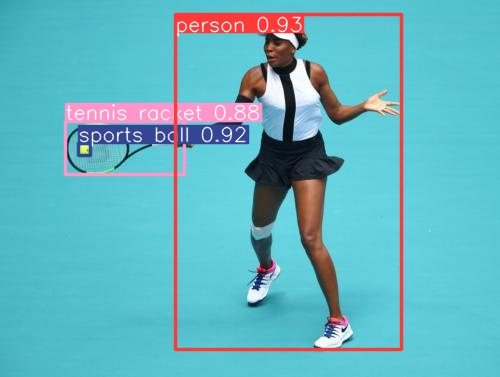

In [10]:
obj_det('/content/kaggle_data/data/tennis/00000007.jpg')


image 1/1 /content/kaggle_data/data/formula1/00000023.jpg: 416x640 1 truck, 284.7ms
Speed: 2.4ms preprocess, 284.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


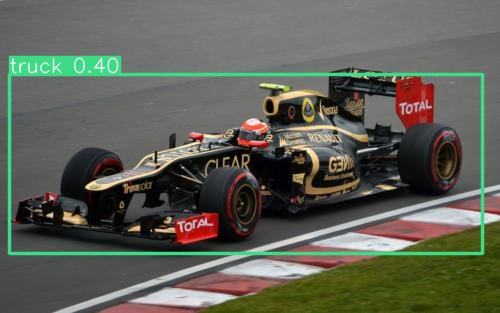

In [11]:
obj_det('/content/kaggle_data/data/formula1/00000023.jpg')


image 1/1 /content/kaggle_data/data/baseball/00000028.jpg: 448x640 12 persons, 3 baseball bats, 264.2ms
Speed: 6.1ms preprocess, 264.2ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels


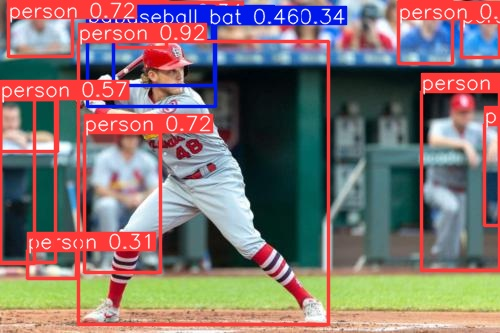

In [12]:
obj_det('/content/kaggle_data/data/baseball/00000028.jpg')


image 1/1 /content/kaggle_data/data/gymnastics/00000055.jpg: 448x640 3 persons, 50.4ms
Speed: 5.7ms preprocess, 50.4ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
4 labels saved to runs/detect/predict/labels


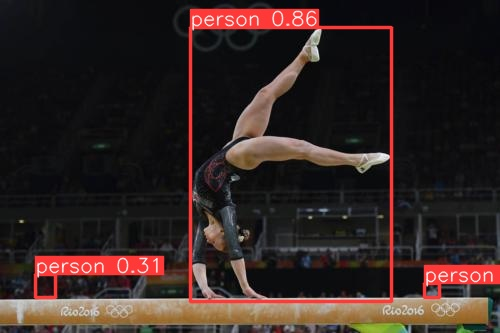

In [13]:
obj_det('/content/kaggle_data/data/gymnastics/00000055.jpg')

## Object Detection - RetinaNet

In [4]:
!git clone https://github.com/fizyr/keras-retinanet
%cd keras-retinanet
!pip install .

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6224, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 6224 (delta 6), reused 9 (delta 2), pack-reused 6205
Receiving objects: 100% (6224/6224), 13.48 MiB | 18.24 MiB/s, done.
Resolving deltas: 100% (4207/4207), done.
/content/keras-retinanet
Processing /content/keras-retinanet
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=208015 sha256=2e097f4bc902f53a12f00e9115b7baef1faffb2670bb1bcd29555a4a03b767b2
  Stored in directory: /root/.cache/pip/wheels/30/a8/71/bccf2f8331abdd2183df34261c5faea07ce65324a12c97af2e
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20457 sha256=f938925346ce720cc4b20fed426aa9a6cb40d5a8bf3f9706fe2dbc8f271045d2
  Stored in directory: /root/.cache/pip/wheels/16/af/88/

In [5]:
!python /content/keras-retinanet/setup.py build_ext --inplace

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running build_ext
copying build/lib.linux-x86_64-cpython-310/keras_retinanet/utils/compute_overlap.cpython-310-x86_64-linux-gnu.so -> keras_retinanet/utils


In [6]:
from tensorflow import keras
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

In [8]:
#Load trained model and retinanet model and labels
model_path = os.path.join('/content/keras-retinanet', 'snapshots', 'resnet50_coco_best_v2.1.0.h5')
model = models.load_model(model_path, backbone_name='resnet50')
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light',
                   10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow',
                   20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee',
                   30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle',
                   40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange',
                   50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed',
                   60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven',
                   70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

In [9]:
#Function to predict object classes
def retinanet_det(img_path):
  # load image
  image = read_image_bgr(img_path)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < 0.5:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)
  plt.figure(figsize=(15, 15))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

processing time:  14.791831970214844


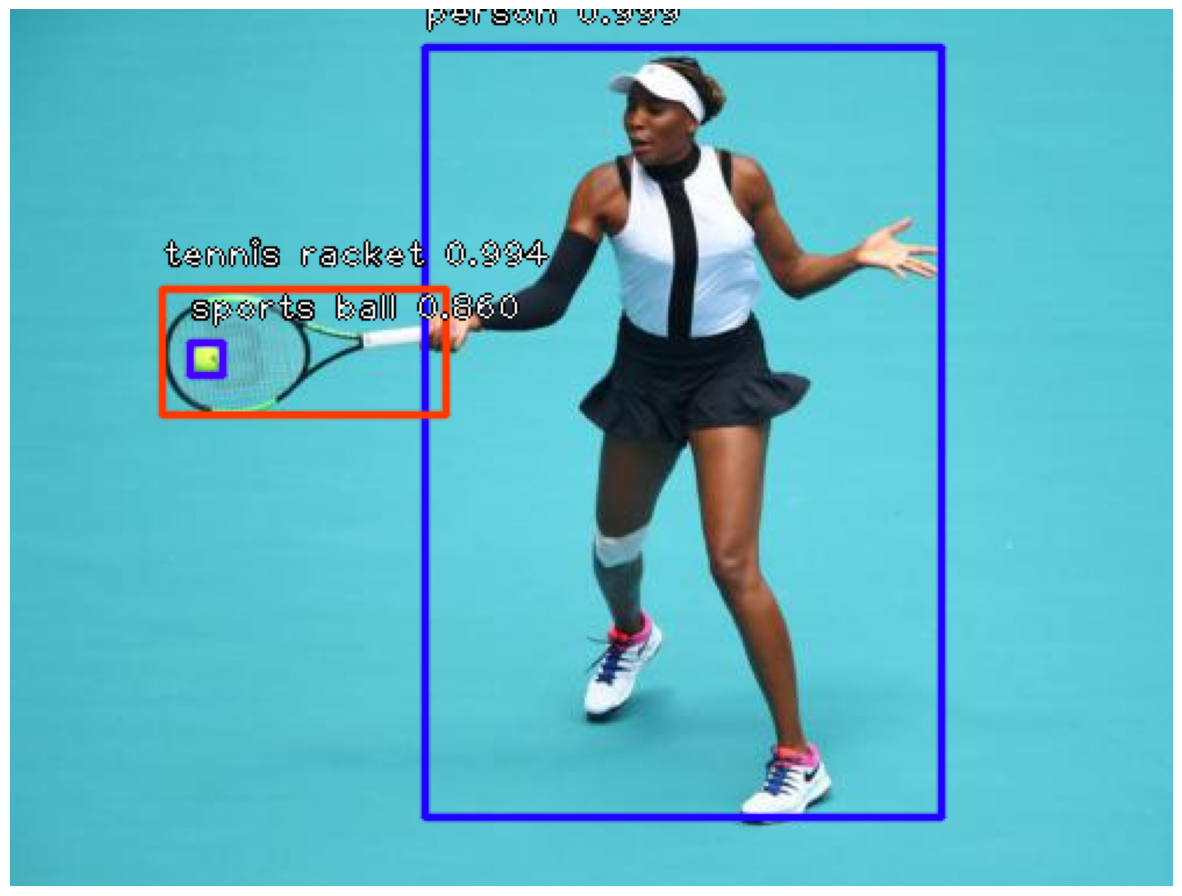

In [10]:
retinanet_det('/content/kaggle_data/data/tennis/00000007.jpg')

processing time:  7.507517337799072


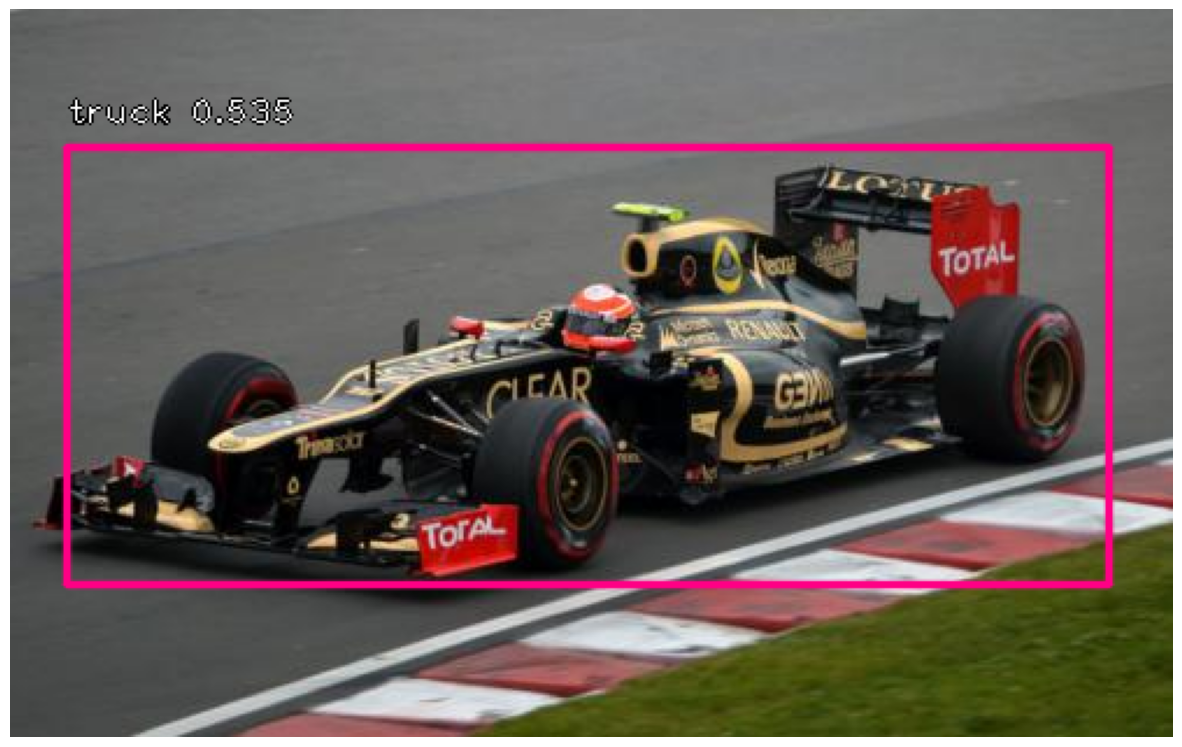

In [11]:
retinanet_det('/content/kaggle_data/data/formula1/00000023.jpg')

processing time:  2.0498955249786377


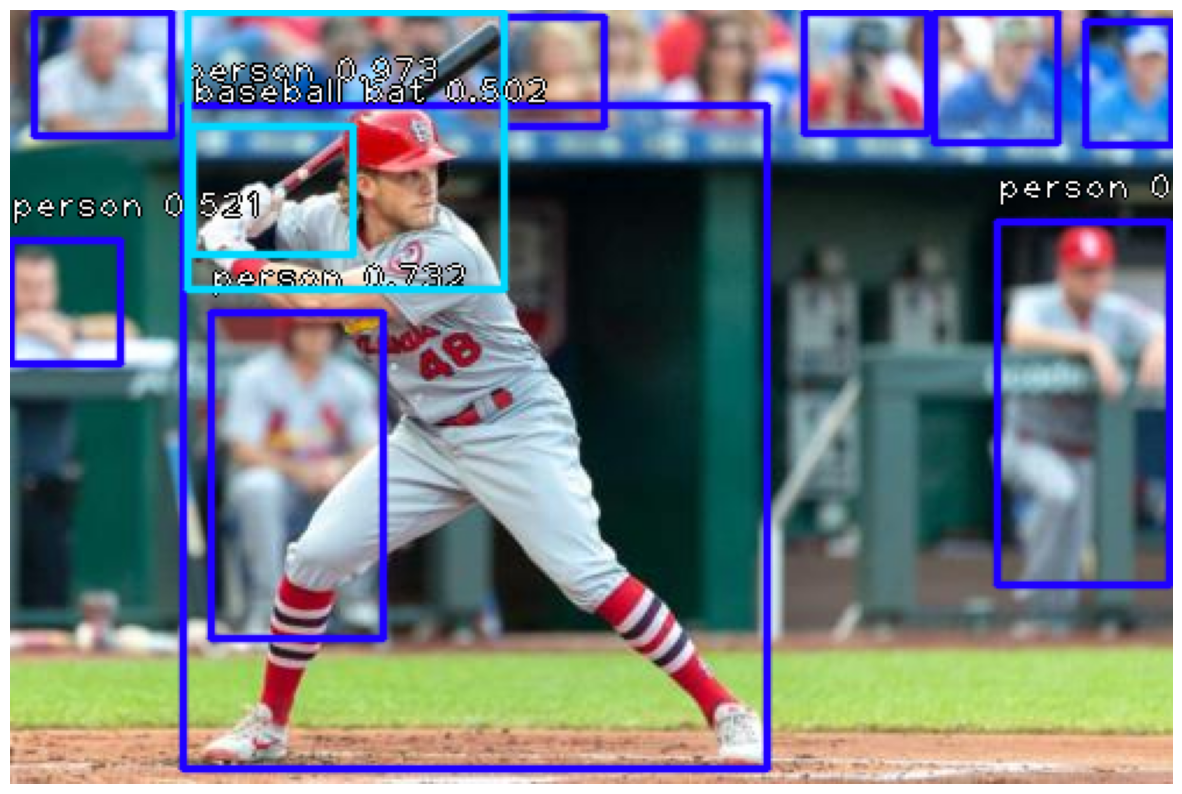

In [12]:
retinanet_det('/content/kaggle_data/data/baseball/00000028.jpg')

processing time:  0.16220474243164062


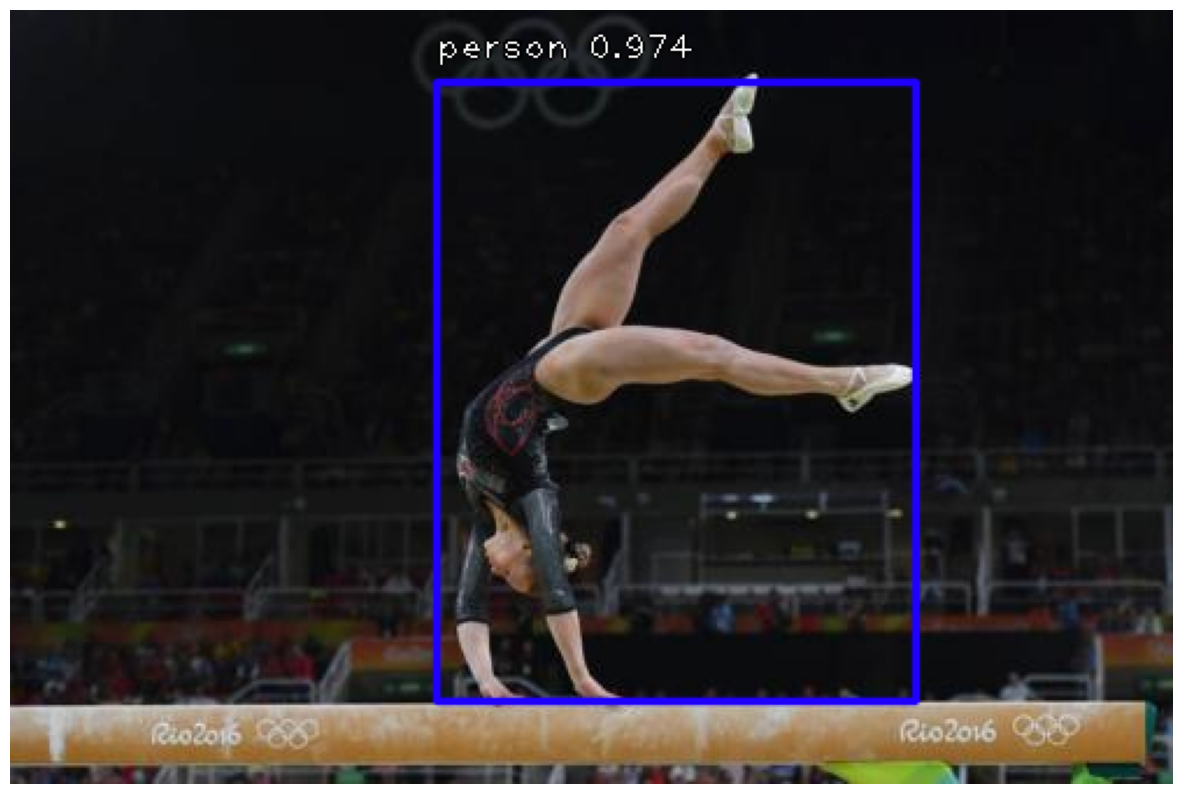

In [13]:
retinanet_det('/content/kaggle_data/data/gymnastics/00000055.jpg')

#Building Classification model

Resnet does get rescaled 1/255

efficientNet does not require image rescale

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                                labels='inferred',
                                                                image_size=IMAGE_SIZE,
                                                                validation_split=0.2,
                                                                label_mode= 'categorical',
                                                                subset="both",
                                                                batch_size=BATCH_SIZE,
                                                                #  color_mode="grayscale"
                                                                seed=58)

print(type(train_ds))
print(train_ds.take(1))
categories = train_ds.class_names

Found 14184 files belonging to 22 classes.
Using 11348 files for training.
Using 2836 files for validation.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>


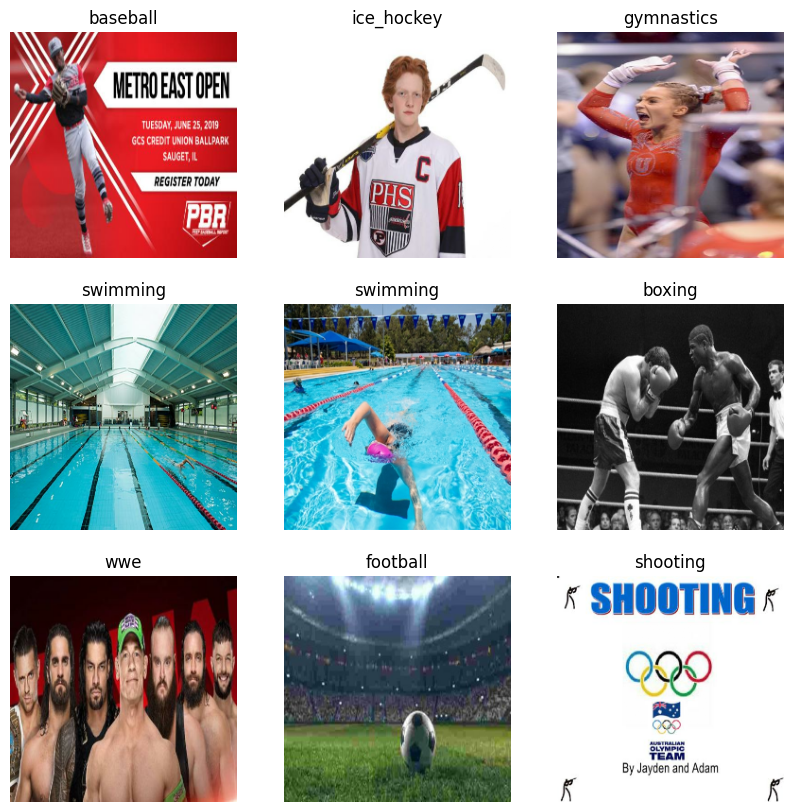

In [ ]:
def display_img(train_ds):
  class_names = train_ds.class_names
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(2):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      image_np = np.array(images[i], dtype=np.float32) / 255.0 # converting to numpy and scaling values
      plt.imshow(image_np)   # Needed to use a converted image
      label_index = tf.argmax(labels[i]).numpy()
      plt.title(class_names[label_index])
      plt.axis("off")

display_img(train_ds)

In [ ]:
print("DS Element \n", train_ds.take(1))

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

DS Element 
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>
(32, 224, 224, 3)
(32, 22)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
import tensorflow_hub as hub
from tensorflow.keras import layers


def create_model(model_url, num_classes=len(categories)):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """

  rescaling_layer = layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    rescaling_layer,
    feature_extractor_layer, # use the feature extraction layer as the
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [ ]:
# Create model
resnet_model = create_model(resnet_url)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
resnet_history = resnet_model.fit(train_ds,
                                  epochs=5,
                                  steps_per_epoch=len(train_ds),
                                  validation_data=val_ds,
                                  validation_steps=len(val_ds))

Epoch 1/5
355/355 [==============================] - 44s 114ms/step - loss: 0.8899 - accuracy: 0.7391 - val_loss: 0.6952 - val_accuracy: 0.7941
Epoch 2/5
355/355 [==============================] - 39s 110ms/step - loss: 0.3931 - accuracy: 0.8792 - val_loss: 0.6576 - val_accuracy: 0.8114
Epoch 3/5
355/355 [==============================] - 39s 110ms/step - loss: 0.2390 - accuracy: 0.9287 - val_loss: 0.6747 - val_accuracy: 0.8117
Epoch 4/5
355/355 [==============================] - 42s 117ms/step - loss: 0.1402 - accuracy: 0.9614 - val_loss: 0.6877 - val_accuracy: 0.8205
Epoch 5/5
355/355 [==============================] - 39s 110ms/step - loss: 0.0896 - accuracy: 0.9787 - val_loss: 0.7011 - val_accuracy: 0.8300


In [ ]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_34 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 output_layer (Dense)        (None, 22)                2838      
                                                                 
Total params: 23829910 (90.90 MB)
Trainable params: 265110 (1.01 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


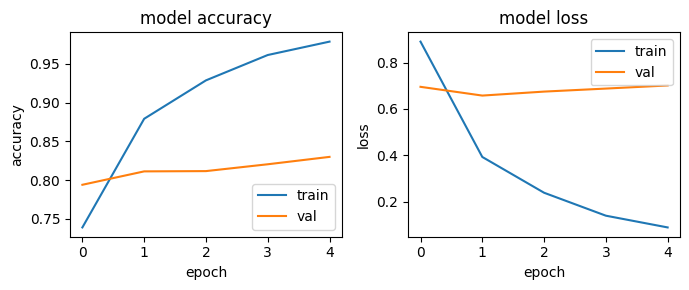

In [ ]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  plt.figure(figsize=(7, 3))
  plt.subplot(1,2,1)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.tight_layout()
learning_curve(resnet_history)

In [ ]:
# Retrieve an Image
index = 10
image_batch, label_batch = next(iter(val_ds.shuffle(buffer_size=BATCH_SIZE).take(index)))
print("image shape", image_batch.shape)
image = image_batch[0].numpy()
print("label", label_batch[0].numpy())
# true_label = categories[np.argmax(label_batch[0].numpy())]
true_label_index = np.argmax(label_batch[0].numpy())
true_label = categories[true_label_index]

# Preprocess the Image
# preprocessed_image = rescaling_layer(image.reshape(1, 240, 240, 3))
preprocessed_image = layers.Rescaling(1./255)(image.reshape(1, 224, 224, 3))

# Make Prediction
predictions = resnet_model.predict(preprocessed_image)
print(predictions.shape)
print(predictions)

# Post-process Predictions
predicted_label_index = np.argmax(predictions)
print("label index", predicted_label_index)
predicted_label = categories[predicted_label_index]
# predicted_label = categories[np.argmax(predictions)]

print("True Label:", true_label)
print("Predicted Label:", predicted_label)

image shape (32, 224, 224, 3)
label [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 35ms/step
(1, 22)
[[2.34139953e-02 2.54891976e-03 1.20887056e-03 7.79413269e-04
  5.16916625e-03 5.80184860e-03 6.17309749e-01 1.29323043e-02
  2.02220567e-02 2.14016791e-02 3.82339619e-02 1.45165157e-03
  5.61913615e-03 8.10354576e-03 2.23331829e-03 1.25953276e-03
  1.01447694e-01 7.74218980e-03 5.65083406e-04 1.20674714e-01
  1.27478025e-03 6.06427027e-04]]
label index 6
True Label: basketball
Predicted Label: fencing
